In [10]:
# load data

import scipy.io

mat = scipy.io.loadmat('Xtrain.mat')

mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Apr 29 11:11:31 2019',
 '__version__': '1.0',
 '__globals__': [],
 'Xtrain': array([[ 86],
        [141],
        [ 95],
        [ 41],
        [ 22],
        [ 21],
        [ 32],
        [ 72],
        [138],
        [111],
        [ 48],
        [ 23],
        [ 19],
        [ 27],
        [ 59],
        [129],
        [129],
        [ 58],
        [ 27],
        [ 19],
        [ 24],
        [ 46],
        [112],
        [144],
        [ 73],
        [ 30],
        [ 20],
        [ 19],
        [ 37],
        [ 92],
        [152],
        [ 93],
        [ 36],
        [ 20],
        [ 18],
        [ 29],
        [ 71],
        [146],
        [117],
        [ 46],
        [ 23],
        [ 18],
        [ 22],
        [ 52],
        [128],
        [142],
        [ 62],
        [ 26],
        [ 17],
        [ 19],
        [ 37],
        [100],
        [158],
        [ 86],
        [ 32],
        [ 17],
        [ 1

In [11]:
data = mat['Xtrain']
data

array([[ 86],
       [141],
       [ 95],
       [ 41],
       [ 22],
       [ 21],
       [ 32],
       [ 72],
       [138],
       [111],
       [ 48],
       [ 23],
       [ 19],
       [ 27],
       [ 59],
       [129],
       [129],
       [ 58],
       [ 27],
       [ 19],
       [ 24],
       [ 46],
       [112],
       [144],
       [ 73],
       [ 30],
       [ 20],
       [ 19],
       [ 37],
       [ 92],
       [152],
       [ 93],
       [ 36],
       [ 20],
       [ 18],
       [ 29],
       [ 71],
       [146],
       [117],
       [ 46],
       [ 23],
       [ 18],
       [ 22],
       [ 52],
       [128],
       [142],
       [ 62],
       [ 26],
       [ 17],
       [ 19],
       [ 37],
       [100],
       [158],
       [ 86],
       [ 32],
       [ 17],
       [ 17],
       [ 27],
       [ 72],
       [154],
       [118],
       [ 43],
       [ 20],
       [ 15],
       [ 21],
       [ 47],
       [128],
       [150],
       [ 63],
       [ 24],
       [ 16],
      

In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data


array([[0.33201581],
       [0.54940711],
       [0.36758893],
       [0.1541502 ],
       [0.07905138],
       [0.07509881],
       [0.11857708],
       [0.27667984],
       [0.53754941],
       [0.43083004],
       [0.18181818],
       [0.08300395],
       [0.06719368],
       [0.09881423],
       [0.22529644],
       [0.50197628],
       [0.50197628],
       [0.22134387],
       [0.09881423],
       [0.06719368],
       [0.08695652],
       [0.17391304],
       [0.43478261],
       [0.56126482],
       [0.28063241],
       [0.11067194],
       [0.07114625],
       [0.06719368],
       [0.13833992],
       [0.35573123],
       [0.59288538],
       [0.35968379],
       [0.13438735],
       [0.07114625],
       [0.06324111],
       [0.10671937],
       [0.27272727],
       [0.56916996],
       [0.45454545],
       [0.17391304],
       [0.08300395],
       [0.06324111],
       [0.07905138],
       [0.19762846],
       [0.49802372],
       [0.55335968],
       [0.23715415],
       [0.094

In [13]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 20
X, y = create_sequences(scaled_data, n_steps)

## Using cross-validation

In [ ]:
n_samples = len(scaled_data)

cv_n_splits = 5

# n_steps_candidates = [i for i in range(10, 101, 10)] # steps of 10 up to 100, this returns that the best candidate is 10
n_steps_candidates = [i for i in range(1, 11, 1)] # steps of 1 up to 10

min_train_fold_size = n_samples // (cv_n_splits + 1)

print(f"Smallest training fold will have approx {min_train_fold_size} samples.")
print(f"Testing n_steps candidates: {n_steps_candidates}")

Smallest training fold will have approx 166 samples.
Testing n_steps candidates: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout



tscv = TimeSeriesSplit(n_splits=cv_n_splits)
results_mae = {} # Store average MSE for each n_steps

# Perform Cross-Validation
for n_steps_candidate in n_steps_candidates:
    print(f"\nEvaluating n_steps = {n_steps_candidate}")
    fold_mses = []
    fold_idx = 0

    for train_index, test_index in tscv.split(scaled_data):
        fold_idx += 1
        print(f"  Fold {fold_idx}/{cv_n_splits}")
        
        # Prepare training data for the current fold
        train_data_fold = scaled_data[train_index]
        X_train_fold, y_train_fold = create_sequences(train_data_fold, n_steps_candidate)

        # Reshape X_train_fold if it's not empty
        X_train_fold = X_train_fold.reshape((X_train_fold.shape[0], n_steps_candidate, 1))

        # Define and compile the model (fresh for each fold for simplicity)
        # For faster CV, you could potentially reset weights if architecture is fixed.
        model_cv = Sequential([
            SimpleRNN(50, activation='tanh', input_shape=(n_steps_candidate, 1)),
            Dropout(0.2),
            Dense(1)
        ])
        model_cv.compile(optimizer='adam', loss='mse')

        # Train the model
        # print(f"    Training on {X_train_fold.shape[0]} sequences...")
        model_cv.fit(X_train_fold, y_train_fold, epochs=100, verbose=0) # Reduced epochs for CV speed

        # Prepare test data and predict
        # We predict one step ahead for each point in the test set
        y_pred_fold = []
        y_true_fold = []

        for i in range(len(test_index)):
            current_test_point_idx = test_index[i]
            
            # Input sequence for prediction ends at the point before current_test_point_idx and has length n_steps_candidate
            start_idx_for_test_input = current_test_point_idx - n_steps_candidate
            
            input_seq_test = scaled_data[start_idx_for_test_input:current_test_point_idx].reshape(1, n_steps_candidate, 1)
            
            pred_scaled = model_cv.predict(input_seq_test, verbose=0)
            y_pred_fold.append(pred_scaled[0,0])
            y_true_fold.append(scaled_data[current_test_point_idx, 0])
            
        fold_mse = mean_squared_error(y_true_fold, y_pred_fold)
        fold_mses.append(fold_mse)
        print(f"    Fold {fold_idx} MSE: {fold_mse:.6f} for {len(y_true_fold)} test points")

    if fold_mses:
        avg_mse_for_n_steps = np.mean(fold_mses)
        results_mae[n_steps_candidate] = avg_mse_for_n_steps
        print(f"  Average MSE for n_steps = {n_steps_candidate}: {avg_mse_for_n_steps:.6f}")
    else:
        print(f"  No valid MSE calculated for n_steps = {n_steps_candidate} across folds.")
        results_mae[n_steps_candidate] = float('inf') # Assign high error if no results


# Determine the best n_steps

# Filter out inf values before finding min
valid_results = {k: v for k, v in results_mae.items() if v != float('inf')}

best_n_steps = min(valid_results, key=valid_results.get)
print(f"\n--- Cross-Validation Results ---")
for n_s, mse_val in results_mae.items():
    print(f"n_steps = {n_s}, Average MSE = {mse_val:.6f}")
print(f"\nBest n_steps based on Time Series Cross-Validation: {best_n_steps} (MSE: {valid_results[best_n_steps]:.6f})")



Evaluating n_steps = 1
  Fold 1/5
    Fold 1 MSE: 0.014649 for 166 test points
  Fold 2/5
    Fold 2 MSE: 0.036483 for 166 test points
  Fold 3/5
    Fold 3 MSE: 0.032324 for 166 test points
  Fold 4/5
    Fold 4 MSE: 0.005682 for 166 test points
  Fold 5/5
    Fold 5 MSE: 0.023704 for 166 test points
  Average MSE for n_steps = 1: 0.022568

Evaluating n_steps = 2
  Fold 1/5
    Fold 1 MSE: 0.007061 for 166 test points
  Fold 2/5
    Fold 2 MSE: 0.020741 for 166 test points
  Fold 3/5
    Fold 3 MSE: 0.022370 for 166 test points
  Fold 4/5
    Fold 4 MSE: 0.001541 for 166 test points
  Fold 5/5
    Fold 5 MSE: 0.010849 for 166 test points
  Average MSE for n_steps = 2: 0.012512

Evaluating n_steps = 3
  Fold 1/5
    Fold 1 MSE: 0.006916 for 166 test points
  Fold 2/5
    Fold 2 MSE: 0.014972 for 166 test points
  Fold 3/5
    Fold 3 MSE: 0.022784 for 166 test points
  Fold 4/5
    Fold 4 MSE: 0.001306 for 166 test points
  Fold 5/5
    Fold 5 MSE: 0.006914 for 166 test points
  Averag


 Training final model with best_n_steps = 3
Final model trained.

First 10 future predictions (original scale) using best_n_steps=3:
[ 69.7526   162.29477  118.289215  38.741173  17.913826  15.121659
  16.798458  41.279915 111.587296 154.4229  ]


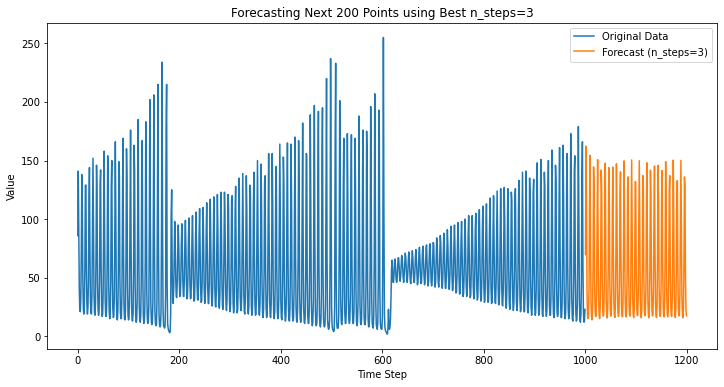

In [30]:
best_n_steps = 3
# Train Final Model with Best n_steps and Make Future Predictions
print(f"\n Training final model with best_n_steps = {best_n_steps}")
X_final, y_final = create_sequences(scaled_data, best_n_steps)

if X_final.shape[0] > 0:
    X_final_reshaped = X_final.reshape((X_final.shape[0], best_n_steps, 1))

    final_model = Sequential([
        SimpleRNN(50, activation='tanh', input_shape=(best_n_steps, 1)),
        Dense(1)
    ])
    final_model.compile(optimizer='adam', loss='mse')
    final_model.fit(X_final_reshaped, y_final, epochs=200, verbose=0) # Use your desired epochs
    print("Final model trained.")

    # Example of making future predictions (as in your original snippet)
    n_future = 200 # Or your desired number of future predictions
    input_seq_future = scaled_data[-best_n_steps:].reshape(1, best_n_steps, 1)
    predictions_scaled_future = []

    for _ in range(n_future):
        next_pred_scaled = final_model.predict(input_seq_future, verbose=0)
        predictions_scaled_future.append(next_pred_scaled[0])
        next_input_reshaped = next_pred_scaled.reshape((1, 1, 1))
        input_seq_future = np.append(input_seq_future[:, 1:, :], next_input_reshaped, axis=1)
    
    predictions_future_original_scale = scaler.inverse_transform(np.array(predictions_scaled_future).reshape(-1,1))
    print(f"\nFirst 10 future predictions (original scale) using best_n_steps={best_n_steps}:")
    print(predictions_future_original_scale[:10].flatten())
    
    # Plotting (optional, as in your original code)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,6))
    plt.plot(range(len(data)), data, label="Original Data")
    plt.plot(range(len(data), len(data) + n_future), predictions_future_original_scale, label=f"Forecast (n_steps={best_n_steps})")
    plt.legend()
    plt.title(f"Forecasting Next {n_future} Points using Best n_steps={best_n_steps}")
    plt.xlabel("Time Step")
    plt.ylabel("Value")
    plt.show()

## Not using cross-validation 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=200, verbose=0)


In [ ]:
n_future = 200
input_seq = scaled_data[-n_steps:].reshape(1, n_steps, 1)  # Start from last known input
predictions_scaled = []

for i in range(n_future):
    next_pred = model.predict(input_seq, verbose=0)  # shape (1, 1)
    predictions_scaled.append(next_pred[0])

    # Correctly reshape to 3D shape: (1, 1, 1)
    next_input = next_pred.reshape((1, 1, 1))

    # Append new prediction to last n-1 steps
    input_seq = np.append(input_seq[:, 1:, :], next_input, axis=1)


In [ ]:
predictions = scaler.inverse_transform(predictions_scaled)
predictions

array([[ 67.71824509],
       [169.25936317],
       [120.66740814],
       [ 38.53141317],
       [ 17.14403486],
       [ 11.52569324],
       [  9.09059535],
       [ 30.5360292 ],
       [112.32355988],
       [180.21062207],
       [ 82.1521036 ],
       [ 26.21101694],
       [ 10.52788145],
       [  6.38113004],
       [ 12.26452154],
       [ 42.88056093],
       [150.90391189],
       [162.19469643],
       [ 51.99141066],
       [ 17.24377759],
       [  9.18003139],
       [  3.71015613],
       [ 13.92988896],
       [ 63.81384726],
       [184.80535477],
       [132.67445379],
       [ 39.04141416],
       [ 13.22413199],
       [  5.04518444],
       [  2.63776826],
       [ 16.74200461],
       [ 79.97335634],
       [210.24100518],
       [115.46753111],
       [ 29.7486283 ],
       [  8.47083523],
       [ -0.34938543],
       [ -0.42801431],
       [  7.15638025],
       [ 62.74626419],
       [225.11038846],
       [133.63011706],
       [ 28.38492919],
       [  8

In [ ]:
# waiting for test data (can't work now)
actual_200 = np.array(actual_values).reshape(-1, 1)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(actual_200, predictions)
mse = mean_squared_error(actual_200, predictions)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")


NameError: name 'actual_values' is not defined

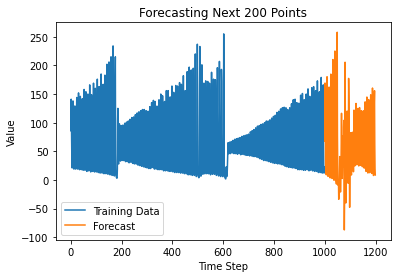

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(data)), data, label="Training Data")
plt.plot(range(len(data), len(data) + n_future), predictions, label="Forecast")
plt.legend()
plt.title("Forecasting Next 200 Points")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.show()
